# 0 LOADING THE NECESSARY LIBRARY

In [1]:
#import pandas
import pandas as pd
from pandas import DataFrame, read_csv
#import of Numpy
import numpy as np
from numpy import ndarray
# import of Seaborn
import seaborn as sns
# import of sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, OneHotEncoder

#from imblearn.over_sampling import SMOTE

# import of Pytorch
import torch
import time
from collections import defaultdict
import torch.nn as nn
import torch.nn.functional as F
from torch import Tensor
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# import of matplotlib
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker

# Style configuration
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (20, 12)
plt.rcParams['font.size'] = 10



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.PREPROCESSING

# 1.1 - data cleaning

In [3]:
#satarting preprocessing code

train_data = pd.read_csv("/content/drive/MyDrive/Tez/UNSW-NB15/UNSW_NB15_training-set.csv")
test_data  = pd.read_csv("/content/drive/MyDrive/Tez/UNSW-NB15/UNSW_NB15_testing-set.csv")

# Fusion pour inspection globale (optionnel)
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)


In [4]:
#globas shape
print("Shape du dataset :", data.shape)

Shape du dataset : (257673, 45)


In [5]:
# shape of train and test data
print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (82332, 45)
Test data shape: (175341, 45)


In [6]:
data.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,...,1,3,0,0,0,2,3,0,Normal,0


In [7]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 45 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 257673 non-null  int64  
 1   dur                257673 non-null  float64
 2   proto              257673 non-null  object 
 3   service            257673 non-null  object 
 4   state              257673 non-null  object 
 5   spkts              257673 non-null  int64  
 6   dpkts              257673 non-null  int64  
 7   sbytes             257673 non-null  int64  
 8   dbytes             257673 non-null  int64  
 9   rate               257673 non-null  float64
 10  sttl               257673 non-null  int64  
 11  dttl               257673 non-null  int64  
 12  sload              257673 non-null  float64
 13  dload              257673 non-null  float64
 14  sloss              257673 non-null  int64  
 15  dloss              257673 non-null  int64  
 16  si

In [8]:
# Vérification des valeurs manquantes
data.isnull().sum()
print("Nombre de doublons :", data.duplicated().sum())


Nombre de doublons : 0


In [9]:
missing_values = data.isnull().sum()
print(missing_values)



id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [10]:
missing_ratio = (data.isnull().sum() / len(data)) * 100
print(missing_ratio)
data = data.dropna()

id                   0.0
dur                  0.0
proto                0.0
service              0.0
state                0.0
spkts                0.0
dpkts                0.0
sbytes               0.0
dbytes               0.0
rate                 0.0
sttl                 0.0
dttl                 0.0
sload                0.0
dload                0.0
sloss                0.0
dloss                0.0
sinpkt               0.0
dinpkt               0.0
sjit                 0.0
djit                 0.0
swin                 0.0
stcpb                0.0
dtcpb                0.0
dwin                 0.0
tcprtt               0.0
synack               0.0
ackdat               0.0
smean                0.0
dmean                0.0
trans_depth          0.0
response_body_len    0.0
ct_srv_src           0.0
ct_state_ttl         0.0
ct_dst_ltm           0.0
ct_src_dport_ltm     0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
is_ftp_login         0.0
ct_ftp_cmd           0.0
ct_flw_http_mthd     0.0


In [11]:
#analysis and correction of the type of variables
data.dtypes


,0
id,int64
dur,float64
proto,object
service,object
state,object
spkts,int64
dpkts,int64
sbytes,int64
dbytes,int64
rate,float64


In [12]:
#list of categorcal cols
categorical_cols = data.select_dtypes(include=['object']).columns
print("categorical colons :", categorical_cols)


categorical colons : Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')


In [13]:
# list of num cols
numerical_cols = data.select_dtypes(include=[np.number]).columns
print("Numerical colons :", numerical_cols)


Numerical colons : Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')


In [14]:
data[categorical_cols].nunique()


,0
proto,133
service,13
state,11
attack_cat,10


# 1.2 - feature encoding

In [15]:
# feature encoding

# target
X = data.drop(columns=['label', 'attack_cat'])
y = data['label']

# definition of the cat_cols
categorical_cols = ['proto', 'service', 'state']


In [16]:
# Split TRAIN / TEST to avoid leakage

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
def safe_label_encode(train_series, test_series):
    le = LabelEncoder()

    # Fit sur train
    train_encoded = le.fit_transform(train_series.astype(str))

    # Transform test avec gestion des valeurs inconnues
    test_encoded = test_series.astype(str).map(
        lambda x: le.transform([x])[0] if x in le.classes_ else -1
    )

    return train_encoded, test_encoded, le

# Utilisation
encoders = {}
for col in categorical_cols:
    X_train[col], X_test[col], encoders[col] = safe_label_encode(
        X_train[col], X_test[col]
    )

In [18]:
print(X_train[categorical_cols].head())
print(X_train[categorical_cols].dtypes)

        proto  service  state
184652     79        0      4
163376    113        5      3
201575    119        2      4
31500     113        5      3
173223    113        3      3
proto      int64
service    int64
state      int64
dtype: object


# 1.3 - data normalization

In [19]:
#data normalization

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Exclure les colonnes catégorielles encodées
numerical_cols = numerical_cols.difference(['proto', 'service', 'state'])


In [20]:
scaler = StandardScaler()

# fit on training set
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

# transform on testing set
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


In [21]:
# verification
print(X_train[numerical_cols].mean().round(2))
print(X_train[numerical_cols].std().round(2))


ackdat               0.0
ct_dst_ltm           0.0
ct_dst_sport_ltm     0.0
ct_dst_src_ltm       0.0
ct_flw_http_mthd     0.0
ct_ftp_cmd           0.0
ct_src_dport_ltm     0.0
ct_src_ltm          -0.0
ct_srv_dst           0.0
ct_srv_src           0.0
ct_state_ttl        -0.0
dbytes              -0.0
dinpkt              -0.0
djit                -0.0
dload               -0.0
dloss               -0.0
dmean               -0.0
dpkts               -0.0
dtcpb                0.0
dttl                 0.0
dur                  0.0
dwin                 0.0
id                   0.0
is_ftp_login        -0.0
is_sm_ips_ports     -0.0
rate                 0.0
response_body_len    0.0
sbytes               0.0
sinpkt              -0.0
sjit                -0.0
sload                0.0
sloss               -0.0
smean               -0.0
spkts                0.0
stcpb                0.0
sttl                -0.0
swin                -0.0
synack               0.0
tcprtt               0.0
trans_depth         -0.0


# 1.4 - class embalance handling

In [22]:
# comptage des classes
class_counts = np.bincount(y_train)

num_neg = class_counts[0]
num_pos = class_counts[1]

pos_weight = torch.tensor(num_neg / num_pos, dtype=torch.float)


# 1.5 - data splitting

In [23]:
#1 conversion from Pandas to Numpy

X_train_np = X_train.values
X_test_np = X_test.values

y_train_np = y_train.values
y_test_np = y_test.values

In [24]:
#2 conversion Numpy to Tensor

X_train_tensor = torch.tensor(X_train_np, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_np, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train_np, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_np, dtype=torch.float32)


In [25]:
#3 DATASET CREATION
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


In [26]:

#4 DataLoader CREATION
batch_size = 64

train_loader = DataLoader(
    train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    test_dataset,
    batch_size=batch_size,
    shuffle=False
)


# 2 MODEL ARCHITECTURE FOR BiLSTM

## 2.1 Model

In [27]:
class DeepBiLSTM_IDS(nn.Module):
    def __init__(
        self,
        input_size=43,
        hidden_size=256,
        num_layers=3,
        dropout=0.4,
        fc_hidden=128
    ):
        super(DeepBiLSTM_IDS, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Input projection layer
        self.input_proj = nn.Linear(input_size, hidden_size)
        self.input_bn = nn.BatchNorm1d(hidden_size)

        # Stacked Bidirectional LSTM
        self.bilstm = nn.LSTM(
            input_size=hidden_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout if num_layers > 1 else 0,
            bidirectional=True
        )

        # Attention mechanism
        self.attention = nn.Linear(hidden_size * 2, 1)

        # Dropout
        self.dropout = nn.Dropout(dropout)

        # Deep fully connected layers
        self.fc1 = nn.Linear(hidden_size * 2, fc_hidden)
        self.bn1 = nn.BatchNorm1d(fc_hidden)

        self.fc2 = nn.Linear(fc_hidden, fc_hidden // 2)
        self.bn2 = nn.BatchNorm1d(fc_hidden // 2)

        self.fc3 = nn.Linear(fc_hidden // 2, fc_hidden // 4)
        self.bn3 = nn.BatchNorm1d(fc_hidden // 4)

        # Output layer
        self.fc_out = nn.Linear(fc_hidden // 4, 1)

    def forward(self, x):
        # Input projection
        x = self.input_proj(x)
        x = self.input_bn(x)
        x = F.relu(x)
        x = self.dropout(x)

        # Reshape for LSTM
        x = x.unsqueeze(1)  # (batch, 1, hidden_size)

        # BiLSTM
        lstm_out, _ = self.bilstm(x)  # (batch, 1, hidden_size*2)

        # Attention mechanism
        attention_weights = torch.softmax(
            self.attention(lstm_out), dim=1
        )  # (batch, 1, 1)

        # Apply attention
        attended = torch.sum(attention_weights * lstm_out, dim=1)  # (batch, hidden_size*2)

        # Dropout
        out = self.dropout(attended)

        # Deep fully connected layers
        out = F.relu(self.bn1(self.fc1(out)))
        out = self.dropout(out)

        out = F.relu(self.bn2(self.fc2(out)))
        out = self.dropout(out)

        out = F.relu(self.bn3(self.fc3(out)))
        out = self.dropout(out)

        # Output
        out = self.fc_out(out)

        return out

## 2.2 Training functions

In [28]:
def train_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for batch_idx, (inputs, labels) in enumerate(train_loader):
        # Move data to device
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1)  # (batch, 1)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()

        # Gradient clipping to prevent exploding gradients
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

        optimizer.step()

        # Track loss
        running_loss += loss.item()

        # Store predictions for metrics
        preds = torch.sigmoid(outputs) > 0.5
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    # Calculate average loss
    avg_loss = running_loss / len(train_loader)

    # Calculate metrics
    all_preds = np.array(all_preds).flatten()
    all_labels = np.array(all_labels).flatten()

    metrics = {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, zero_division=0),
        'recall': recall_score(all_labels, all_preds, zero_division=0),
        'f1': f1_score(all_labels, all_preds, zero_division=0)
    }

    return avg_loss, metrics

## 2.3 evaluation function
### Evaluate model on test set with FPR and Detection Time

In [29]:
def evaluate(model, test_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    all_preds = []
    all_probs = []
    all_labels = []
    total_inference_time = 0.0
    num_samples = 0

    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move data to device
            inputs = inputs.to(device)
            labels = labels.to(device).unsqueeze(1)

            # Measure inference time
            if device.type == 'cuda':
                torch.cuda.synchronize()

            start_time = time.time()

            # Forward pass
            outputs = model(inputs)

            if device.type == 'cuda':
                torch.cuda.synchronize()

            inference_time = time.time() - start_time
            total_inference_time += inference_time
            num_samples += inputs.size(0)

            # Calculate loss
            loss = criterion(outputs, labels)
            running_loss += loss.item()

            # Store predictions and probabilities
            probs = torch.sigmoid(outputs)
            preds = probs > 0.5

            all_probs.extend(probs.cpu().numpy())
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Calculate average loss
    avg_loss = running_loss / len(test_loader)

    # Convert to numpy arrays
    all_preds = np.array(all_preds).flatten()
    all_probs = np.array(all_probs).flatten()
    all_labels = np.array(all_labels).flatten()

    # Confusion matrix
    cm = confusion_matrix(all_labels, all_preds)

    # Calculate metrics including FPR
    tn, fp, fn, tp = cm.ravel()

    # False Positive Rate (FPR) = FP / (FP + TN)
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0

    # Detection Rate (True Positive Rate / Recall) = TP / (TP + FN)
    detection_rate = tp / (tp + fn) if (tp + fn) > 0 else 0.0

    # Average detection time per sample (in milliseconds)
    avg_detection_time = (total_inference_time / num_samples) * 1000

    metrics = {
        'accuracy': accuracy_score(all_labels, all_preds),
        'precision': precision_score(all_labels, all_preds, zero_division=0),
        'recall': recall_score(all_labels, all_preds, zero_division=0),
        'f1': f1_score(all_labels, all_preds, zero_division=0),
        'auc': roc_auc_score(all_labels, all_probs),
        'fpr': fpr,  # False Positive Rate
        'detection_rate': detection_rate,  # Detection Rate (TPR)
        'detection_time_ms': avg_detection_time,  # Detection time in ms per sample
        'throughput': num_samples / total_inference_time  # Samples per second
    }

    return avg_loss, metrics, cm

In [30]:
def train_model(
    model,
    train_loader,
    test_loader,
    criterion,
    optimizer,
    scheduler,
    device,
    num_epochs=50,
    patience=10,
    save_path='best_deep_bilstm.pth'
):
    print("-" * 80)
    print("TRAINING DEEP BiLSTM WITH ATTENTION FOR NETWORK INTRUSION DETECTION")
    print("-" * 80)
    print(f"Device: {device}")
    print(f"Total Parameters: {sum(p.numel() for p in model.parameters()):,}")
    print(f"Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
    print(f"Max Epochs: {num_epochs} | Early Stopping Patience: {patience}")
    print("-" * 80)

    # Initialize history
    history = {
        'train_loss': [],
        'test_loss': [],
        'train_acc': [],
        'test_acc': [],
        'train_f1': [],
        'test_f1': [],
        'test_precision': [],
        'test_recall': [],
        'test_auc': [],
        'test_fpr': [],  # False Positive Rate
        'test_detection_rate': [],  # Detection Rate (TPR)
        'test_detection_time_ms': [],  # Detection time per sample
        'test_throughput': [],  # Samples per second
        'learning_rates': []
    }

    # Early stopping variables
    best_f1 = 0.0
    epochs_no_improve = 0

    # Training loop
    for epoch in range(num_epochs):
        epoch_start_time = time.time()

        # Train one epoch
        train_loss, train_metrics = train_epoch(
            model, train_loader, criterion, optimizer, device
        )

        # Evaluate on test set
        test_loss, test_metrics, cm = evaluate(
            model, test_loader, criterion, device
        )

        # Learning rate scheduling
        scheduler.step(test_metrics['f1'])
        current_lr = optimizer.param_groups[0]['lr']

        # Store history
        history['train_loss'].append(train_loss)
        history['test_loss'].append(test_loss)
        history['train_acc'].append(train_metrics['accuracy'])
        history['test_acc'].append(test_metrics['accuracy'])
        history['train_f1'].append(train_metrics['f1'])
        history['test_f1'].append(test_metrics['f1'])
        history['test_precision'].append(test_metrics['precision'])
        history['test_recall'].append(test_metrics['recall'])
        history['test_auc'].append(test_metrics['auc'])
        history['test_fpr'].append(test_metrics['fpr'])
        history['test_detection_rate'].append(test_metrics['detection_rate'])
        history['test_detection_time_ms'].append(test_metrics['detection_time_ms'])
        history['test_throughput'].append(test_metrics['throughput'])
        history['learning_rates'].append(current_lr)

        # Calculate epoch time
        epoch_time = time.time() - epoch_start_time

        # Print epoch results
        print(f"\n{'-'*80}")
        print(f"Epoch [{epoch+1}/{num_epochs}] - Time: {epoch_time:.2f}s - LR: {current_lr:.6f}")
        print(f"{'-'*80}")
        print(f"TRAIN → Loss: {train_loss:.4f} | Acc: {train_metrics['accuracy']:.4f} | F1: {train_metrics['f1']:.4f}")
        print(f"TEST  → Loss: {test_loss:.4f} | Acc: {test_metrics['accuracy']:.4f} | F1: {test_metrics['f1']:.4f}")
        print(f"TEST  → Precision: {test_metrics['precision']:.4f} | Recall: {test_metrics['recall']:.4f} | AUC: {test_metrics['auc']:.4f}")
        print(f"TEST  → FPR: {test_metrics['fpr']:.4f} | Detection Rate: {test_metrics['detection_rate']:.4f}")
        print(f"TEST  → Detection Time: {test_metrics['detection_time_ms']:.4f} ms/sample | Throughput: {test_metrics['throughput']:.2f} samples/s")
        print(f"\nConfusion Matrix:")
        print(f"  TN: {cm[0,0]:6d} | FP: {cm[0,1]:6d}")
        print(f"  FN: {cm[1,0]:6d} | TP: {cm[1,1]:6d}")

        # Early stopping check
        if test_metrics['f1'] > best_f1:
            best_f1 = test_metrics['f1']
            epochs_no_improve = 0

            # Save best model
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'scheduler_state_dict': scheduler.state_dict(),
                'best_f1': best_f1,
                'test_metrics': test_metrics,
                'history': history
            }, save_path)
            print(f"\n BEST MODEL SAVED! F1: {best_f1:.4f}")
        else:
            epochs_no_improve += 1
            print(f"\n No improvement for {epochs_no_improve}/{patience} epoch(s)")

        # Early stopping
        if epochs_no_improve >= patience:
            print(f"\n{'-'*80}")
            print(f"EARLY STOPPING TRIGGERED AFTER {epoch+1} EPOCHS")
            print(f"Best F1 Score: {best_f1:.4f}")
            print(f"{'-'*80}")
            break

    print(f"\n{'-'*80}")
    print(f"TRAINING COMPLETED!")
    print(f"Best F1 Score: {best_f1:.4f}")
    print(f"{'-'*80}\n")

    return history


def load_best_model(model, path='best_deep_bilstm.pth', device='cuda'):
    """
    Load the best saved model

    Returns:
        model: Loaded model
        checkpoint: Full checkpoint dictionary
    """
    checkpoint = torch.load(path, map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    print(f"\n{'-'*80}")
    print(f"MODEL LOADED FROM: {path}")
    print(f"{'-'*80}")
    print(f"Epoch: {checkpoint['epoch']+1}")
    print(f"Best F1 Score: {checkpoint['best_f1']:.4f}")
    print(f"Test Metrics:")
    for key, value in checkpoint['test_metrics'].items():
        print(f"  {key.capitalize()}: {value:.4f}")
    print(f"{'-'*80}\n")

    return model, checkpoint

In [31]:
def load_best_model(model, path='best_deep_bilstm.pth', device='cuda'):
    checkpoint = torch.load(path, map_location=device, weights_only=False)
    model.load_state_dict(checkpoint['model_state_dict'])
    model.eval()

    print(f"\n{'-'*80}")
    print(f"MODEL LOADED FROM: {path}")
    print(f"{'-'*80}")
    print(f"Epoch: {checkpoint['epoch']+1}")
    print(f"Best F1 Score: {checkpoint['best_f1']:.4f}")
    print(f"Test Metrics:")
    for key, value in checkpoint['test_metrics'].items():
        print(f"  {key.capitalize()}: {value:.4f}")
    print(f"{'-'*80}\n")

    return model, checkpoint

## 2.4 COMPLETE PIPELINE

In [32]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [33]:
def train_deep_bilstm(
    train_loader,
    test_loader,
    pos_weight,
    input_size=43,
    hidden_size=256,
    num_layers=3,
    dropout=0.4,
    fc_hidden=128,
    num_epochs=50,
    learning_rate=0.001,
    patience=10,
    save_path='best_deep_bilstm.pth'
):
    # Create model
    model = DeepBiLSTM_IDS(
        input_size=input_size,
        hidden_size=hidden_size,
        num_layers=num_layers,
        dropout=dropout,
        fc_hidden=fc_hidden
    ).to(device)

    # Loss function with class weighting
    pos_weight_tensor = pos_weight.to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)

    # Optimizer (Adam with weight decay for regularization)
    optimizer = torch.optim.Adam(
        model.parameters(),
        lr=learning_rate,
        weight_decay=1e-5
    )

    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer,
        mode='max',
        factor=0.5,
        patience=5,
        min_lr=1e-6
    )

    # Train model
    history = train_model(
        model=model,
        train_loader=train_loader,
        test_loader=test_loader,
        criterion=criterion,
        optimizer=optimizer,
        scheduler=scheduler,
        device=device,
        num_epochs=num_epochs,
        patience=patience,
        save_path=save_path
    )

    # Load best model
    model, checkpoint = load_best_model(model, path=save_path, device=device)

    # Final evaluation
    print("FINAL EVALUATION ON TEST SET")
    print("-" * 80)
    test_loss, test_metrics, cm = evaluate(model, test_loader, criterion, device)

    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_metrics['accuracy']:.4f}")
    print(f"Test Precision: {test_metrics['precision']:.4f}")
    print(f"Test Recall (Detection Rate): {test_metrics['recall']:.4f}")
    print(f"Test F1 Score: {test_metrics['f1']:.4f}")
    print(f"Test AUC-ROC: {test_metrics['auc']:.4f}")
    print(f"\n--- Performance Metrics ---")
    print(f"False Positive Rate (FPR): {test_metrics['fpr']:.4f} ({test_metrics['fpr']*100:.2f}%)")
    print(f"Detection Rate (TPR): {test_metrics['detection_rate']:.4f} ({test_metrics['detection_rate']*100:.2f}%)")
    print(f"Detection Time: {test_metrics['detection_time_ms']:.4f} ms per sample")
    print(f"Throughput: {test_metrics['throughput']:.2f} samples/second")
    print(f"\nConfusion Matrix:")
    print(f"  TN: {cm[0,0]:6d} | FP: {cm[0,1]:6d}")
    print(f"  FN: {cm[1,0]:6d} | TP: {cm[1,1]:6d}")
    print("-" * 80)

    return model, history

In [34]:
def plot_learning_curves(history, save_path='learning_curves.png'):

    fig = plt.figure(figsize=(20, 12))
    gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

    epochs = range(1, len(history['train_loss']) + 1)

    # 1. Loss Evolution (Train vs Test)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(epochs, history['train_loss'], 'b-o', label='Train Loss', linewidth=2, markersize=4)
    ax1.plot(epochs, history['test_loss'], 'r-s', label='Test Loss', linewidth=2, markersize=4)
    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('Loss', fontweight='bold')
    ax1.set_title('Loss Evolution', fontsize=12, fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)

    # 2. Accuracy Evolution
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(epochs, history['train_acc'], 'b-o', label='Train Accuracy', linewidth=2, markersize=4)
    ax2.plot(epochs, history['test_acc'], 'r-s', label='Test Accuracy', linewidth=2, markersize=4)
    ax2.set_xlabel('Epoch', fontweight='bold')
    ax2.set_ylabel('Accuracy', fontweight='bold')
    ax2.set_title('Accuracy Evolution', fontsize=12, fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1.05])

    # 3. F1 Score Evolution
    ax3 = fig.add_subplot(gs[0, 2])
    ax3.plot(epochs, history['train_f1'], 'b-o', label='Train F1', linewidth=2, markersize=4)
    ax3.plot(epochs, history['test_f1'], 'r-s', label='Test F1', linewidth=2, markersize=4)
    ax3.set_xlabel('Epoch', fontweight='bold')
    ax3.set_ylabel('F1 Score', fontweight='bold')
    ax3.set_title('F1 Score Evolution', fontsize=12, fontweight='bold')
    ax3.legend(loc='best')
    ax3.grid(True, alpha=0.3)
    ax3.set_ylim([0, 1.05])

    # 4. Precision & Recall
    ax4 = fig.add_subplot(gs[1, 0])
    ax4.plot(epochs, history['test_precision'], 'g-^', label='Precision', linewidth=2, markersize=4)
    ax4.plot(epochs, history['test_recall'], 'm-v', label='Recall', linewidth=2, markersize=4)
    ax4.set_xlabel('Epoch', fontweight='bold')
    ax4.set_ylabel('Score', fontweight='bold')
    ax4.set_title('Precision & Recall Evolution', fontsize=12, fontweight='bold')
    ax4.legend(loc='best')
    ax4.grid(True, alpha=0.3)
    ax4.set_ylim([0, 1.05])

    # 5. AUC-ROC Evolution
    ax5 = fig.add_subplot(gs[1, 1])
    ax5.plot(epochs, history['test_auc'], 'purple', marker='D', linewidth=2, markersize=4)
    ax5.set_xlabel('Epoch', fontweight='bold')
    ax5.set_ylabel('AUC-ROC', fontweight='bold')
    ax5.set_title('AUC-ROC Evolution', fontsize=12, fontweight='bold')
    ax5.grid(True, alpha=0.3)
    ax5.set_ylim([0, 1.05])

    # 6. False Positive Rate (FPR)
    ax6 = fig.add_subplot(gs[1, 2])
    ax6.plot(epochs, history['test_fpr'], 'red', marker='x', linewidth=2, markersize=6)
    ax6.set_xlabel('Epoch', fontweight='bold')
    ax6.set_ylabel('FPR', fontweight='bold')
    ax6.set_title('False Positive Rate Evolution', fontsize=12, fontweight='bold')
    ax6.grid(True, alpha=0.3)
    ax6.set_ylim([0, max(history['test_fpr']) * 1.1])

    # 7. Detection Rate (TPR)
    ax7 = fig.add_subplot(gs[2, 0])
    ax7.plot(epochs, history['test_detection_rate'], 'darkgreen', marker='*', linewidth=2, markersize=6)
    ax7.set_xlabel('Epoch', fontweight='bold')
    ax7.set_ylabel('Detection Rate (TPR)', fontweight='bold')
    ax7.set_title('Detection Rate Evolution', fontsize=12, fontweight='bold')
    ax7.grid(True, alpha=0.3)
    ax7.set_ylim([0, 1.05])

    # 8. Detection Time (ms)
    ax8 = fig.add_subplot(gs[2, 1])
    ax8.plot(epochs, history['test_detection_time_ms'], 'orange', marker='h', linewidth=2, markersize=4)
    ax8.set_xlabel('Epoch', fontweight='bold')
    ax8.set_ylabel('Detection Time (ms)', fontweight='bold')
    ax8.set_title('Detection Time per Sample', fontsize=12, fontweight='bold')
    ax8.grid(True, alpha=0.3)

    # 9. Learning Rate Schedule
    ax9 = fig.add_subplot(gs[2, 2])
    ax9.plot(epochs, history['learning_rates'], 'navy', marker='o', linewidth=2, markersize=4)
    ax9.set_xlabel('Epoch', fontweight='bold')
    ax9.set_ylabel('Learning Rate', fontweight='bold')
    ax9.set_title('Learning Rate Schedule', fontsize=12, fontweight='bold')
    ax9.set_yscale('log')
    ax9.grid(True, alpha=0.3)

    plt.suptitle('Deep BiLSTM Training Curves - UNSW-NB15 IDS',
                 fontsize=16, fontweight='bold', y=0.995)

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f" Learning curves saved to: {save_path}")
    plt.show()

    #comparison

def plot_performance_comparison(history, save_path='performance_comparison.png'):


    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Performance Metrics Comparison', fontsize=16, fontweight='bold')

    epochs = range(1, len(history['train_loss']) + 1)

    # 1. Accuracy vs F1 Score
    ax1 = axes[0, 0]
    ax1.plot(epochs, history['test_acc'], 'b-o', label='Accuracy', linewidth=2)
    ax1.plot(epochs, history['test_f1'], 'r-s', label='F1 Score', linewidth=2)
    ax1.plot(epochs, history['test_auc'], 'g-^', label='AUC-ROC', linewidth=2)
    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('Score', fontweight='bold')
    ax1.set_title('Classification Metrics', fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim([0, 1.05])

    # 2. Precision vs Recall
    ax2 = axes[0, 1]
    ax2.plot(epochs, history['test_precision'], 'purple', marker='D',
             label='Precision', linewidth=2)
    ax2.plot(epochs, history['test_recall'], 'orange', marker='v',
             label='Recall', linewidth=2)
    ax2.set_xlabel('Epoch', fontweight='bold')
    ax2.set_ylabel('Score', fontweight='bold')
    ax2.set_title('Precision vs Recall', fontweight='bold')
    ax2.legend(loc='best')
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1.05])

    # 3. FPR vs Detection Rate
    ax3 = axes[1, 0]
    ax3_twin = ax3.twinx()

    line1 = ax3.plot(epochs, history['test_fpr'], 'red', marker='x',
                     label='FPR (Lower is better)', linewidth=2, markersize=6)
    line2 = ax3_twin.plot(epochs, history['test_detection_rate'], 'darkgreen',
                          marker='*', label='Detection Rate (Higher is better)',
                          linewidth=2, markersize=6)

    ax3.set_xlabel('Epoch', fontweight='bold')
    ax3.set_ylabel('False Positive Rate', fontweight='bold', color='red')
    ax3_twin.set_ylabel('Detection Rate (TPR)', fontweight='bold', color='darkgreen')
    ax3.set_title('FPR vs Detection Rate Trade-off', fontweight='bold')
    ax3.tick_params(axis='y', labelcolor='red')
    ax3_twin.tick_params(axis='y', labelcolor='darkgreen')
    ax3.grid(True, alpha=0.3)

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    ax3.legend(lines, labels, loc='best')

    # 4. Loss Convergence
    ax4 = axes[1, 1]
    ax4.plot(epochs, history['train_loss'], 'b-o', label='Train Loss', linewidth=2)
    ax4.plot(epochs, history['test_loss'], 'r-s', label='Test Loss', linewidth=2)
    ax4.set_xlabel('Epoch', fontweight='bold')
    ax4.set_ylabel('Loss', fontweight='bold')
    ax4.set_title('Loss Convergence', fontweight='bold')
    ax4.legend(loc='best')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f" Performance comparison saved to: {save_path}")
    plt.show()

    # training summary
def plot_training_summary(history, save_path='training_summary.png'):


    fig = plt.figure(figsize=(18, 10))
    gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

    epochs = range(1, len(history['train_loss']) + 1)

    # 1. Loss with moving average
    ax1 = fig.add_subplot(gs[0, :2])
    ax1.plot(epochs, history['train_loss'], 'b-', alpha=0.3, label='Train Loss')
    ax1.plot(epochs, history['test_loss'], 'r-', alpha=0.3, label='Test Loss')

    # Moving average
    window = min(5, len(epochs))
    if len(epochs) >= window:
        train_ma = np.convolve(history['train_loss'], np.ones(window)/window, mode='valid')
        test_ma = np.convolve(history['test_loss'], np.ones(window)/window, mode='valid')
        ma_epochs = range(window, len(epochs) + 1)
        ax1.plot(ma_epochs, train_ma, 'b-', linewidth=2, label=f'Train MA({window})')
        ax1.plot(ma_epochs, test_ma, 'r-', linewidth=2, label=f'Test MA({window})')

    ax1.set_xlabel('Epoch', fontweight='bold')
    ax1.set_ylabel('Loss', fontweight='bold')
    ax1.set_title('Loss Evolution with Moving Average', fontsize=12, fontweight='bold')
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)

    # 2. Statistiques textuelles
    ax2 = fig.add_subplot(gs[0, 2])
    ax2.axis('off')

    stats_text = f"""
    TRAINING STATISTICS
    {'-'*30}

    Total Epochs: {len(epochs)}

    FINAL METRICS:
    • Accuracy: {history['test_acc'][-1]:.4f}
    • Precision: {history['test_precision'][-1]:.4f}
    • Recall: {history['test_recall'][-1]:.4f}
    • F1 Score: {history['test_f1'][-1]:.4f}
    • AUC-ROC: {history['test_auc'][-1]:.4f}

    PERFORMANCE:
    • FPR: {history['test_fpr'][-1]:.4f}
    • Detection Rate: {history['test_detection_rate'][-1]:.4f}
    • Detection Time: {history['test_detection_time_ms'][-1]:.4f} ms

    BEST METRICS:
    • Best F1: {max(history['test_f1']):.4f}
    • Best AUC: {max(history['test_auc']):.4f}
    • Lowest FPR: {min(history['test_fpr']):.4f}
    """

    ax2.text(0.1, 0.9, stats_text, transform=ax2.transAxes,
             fontsize=10, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

    # Plot 1: Accuracy
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['test_acc'], label='Accuracy', linewidth=2, color='#2E86AB')
    plt.xlabel('Epoch', fontweight='bold', fontsize=12)
    plt.ylabel('Accuracy', fontweight='bold', fontsize=12)
    plt.title('Model Accuracy Evolution', fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    plt.tight_layout()
    plt.savefig('accuracy_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot 2: Precision
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['test_precision'], label='Precision', linewidth=2, color='#A23B72')
    plt.xlabel('Epoch', fontweight='bold', fontsize=12)
    plt.ylabel('Precision', fontweight='bold', fontsize=12)
    plt.title('Model Precision Evolution', fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    plt.tight_layout()
    plt.savefig('precision_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot 3: Recall
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['test_recall'], label='Recall', linewidth=2, color='#F18F01')
    plt.xlabel('Epoch', fontweight='bold', fontsize=12)
    plt.ylabel('Recall', fontweight='bold', fontsize=12)
    plt.title('Model Recall Evolution', fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    plt.tight_layout()
    plt.savefig('recall_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot 4: F1 Score
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['test_f1'], label='F1 Score', linewidth=2, color='#6A994E')
    plt.xlabel('Epoch', fontweight='bold', fontsize=12)
    plt.ylabel('F1 Score', fontweight='bold', fontsize=12)
    plt.title('Model F1 Score Evolution', fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    plt.tight_layout()
    plt.savefig('f1_score_plot.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot 5: AUC-ROC
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, history['test_auc'], label='AUC-ROC', linewidth=2, color='#BC4B51')
    plt.xlabel('Epoch', fontweight='bold', fontsize=12)
    plt.ylabel('AUC-ROC', fontweight='bold', fontsize=12)
    plt.title('Model AUC-ROC Evolution', fontsize=14, fontweight='bold')
    plt.legend(loc='best')
    plt.grid(True, alpha=0.3)
    plt.ylim([0, 1.05])
    plt.tight_layout()
    plt.savefig('auc_roc_plot.png', dpi=300, bbox_inches='tight')
    plt.show()


def print_training_report(history):
    print("\n" + "-"*80)
    print("DETAILED TRAINING REPORT")
    print("-"*80)

    epochs = len(history['train_loss'])

    print(f"\nTotal Training Epochs: {epochs}")

    print("\n--- LOSS ANALYSIS ---")
    print(f"Initial Train Loss: {history['train_loss'][0]:.6f}")
    print(f"Final Train Loss: {history['train_loss'][-1]:.6f}")
    print(f"Loss Reduction: {(1 - history['train_loss'][-1]/history['train_loss'][0])*100:.2f}%")
    print(f"Initial Test Loss: {history['test_loss'][0]:.6f}")
    print(f"Final Test Loss: {history['test_loss'][-1]:.6f}")

    print("\n--- ACCURACY METRICS ---")
    print(f"Initial Test Accuracy: {history['test_acc'][0]:.4f}")
    print(f"Final Test Accuracy: {history['test_acc'][-1]:.4f}")
    print(f"Best Test Accuracy: {max(history['test_acc']):.4f} (Epoch {np.argmax(history['test_acc']) + 1})")

    print("\n--- F1 SCORE ANALYSIS ---")
    print(f"Initial F1: {history['test_f1'][0]:.4f}")
    print(f"Final F1: {history['test_f1'][-1]:.4f}")
    print(f"Best F1: {max(history['test_f1']):.4f} (Epoch {np.argmax(history['test_f1']) + 1})")
    print(f"F1 Improvement: {(history['test_f1'][-1] - history['test_f1'][0])*100:.2f}%")

    print("\n--- PRECISION & RECALL ---")
    print(f"Final Precision: {history['test_precision'][-1]:.4f}")
    print(f"Final Recall: {history['test_recall'][-1]:.4f}")
    print(f"Best Precision: {max(history['test_precision']):.4f}")
    print(f"Best Recall: {max(history['test_recall']):.4f}")

    print("\n--- AUC-ROC ---")
    print(f"Initial AUC: {history['test_auc'][0]:.4f}")
    print(f"Final AUC: {history['test_auc'][-1]:.4f}")
    print(f"Best AUC: {max(history['test_auc']):.4f} (Epoch {np.argmax(history['test_auc']) + 1})")

    print("\n--- FALSE POSITIVE RATE ---")
    print(f"Initial FPR: {history['test_fpr'][0]:.4f} ({history['test_fpr'][0]*100:.2f}%)")
    print(f"Final FPR: {history['test_fpr'][-1]:.4f} ({history['test_fpr'][-1]*100:.2f}%)")
    print(f"Best FPR: {min(history['test_fpr']):.4f} ({min(history['test_fpr'])*100:.2f}%)")
    print(f"FPR Reduction: {(history['test_fpr'][0] - history['test_fpr'][-1])*100:.2f}%")

    print("\n--- DETECTION RATE (TPR) ---")
    print(f"Initial Detection Rate: {history['test_detection_rate'][0]:.4f} ({history['test_detection_rate'][0]*100:.2f}%)")
    print(f"Final Detection Rate: {history['test_detection_rate'][-1]:.4f} ({history['test_detection_rate'][-1]*100:.2f}%)")
    print(f"Best Detection Rate: {max(history['test_detection_rate']):.4f} ({max(history['test_detection_rate'])*100:.2f}%)")

    print("\n--- DETECTION TIME ---")
    print(f"Initial Detection Time: {history['test_detection_time_ms'][0]:.4f} ms/sample")
    print(f"Final Detection Time: {history['test_detection_time_ms'][-1]:.4f} ms/sample")
    print(f"Average Detection Time: {np.mean(history['test_detection_time_ms']):.4f} ms/sample")
    print(f"Best Detection Time: {min(history['test_detection_time_ms']):.4f} ms/sample")

    print("\n--- THROUGHPUT ---")
    print(f"Final Throughput: {history['test_throughput'][-1]:.2f} samples/second")
    print(f"Average Throughput: {np.mean(history['test_throughput']):.2f} samples/second")

    print("\n--- LEARNING RATE ---")
    print(f"Initial LR: {history['learning_rates'][0]:.6f}")
    print(f"Final LR: {history['learning_rates'][-1]:.6f}")

    print("\n" + "-"*80 + "\n")


def generate_all_visualizations(history, prefix='bilstm'):
    print("\n" + "-"*80)
    print("GENERATING ALL VISUALIZATIONS")
    print("-"*80 + "\n")

    # 1. learning curves
    plot_learning_curves(history, save_path=f'{prefix}_learning_curves.png')

    # 2. performance comparison
    plot_performance_comparison(history, save_path=f'{prefix}_performance_comparison.png')

    # 3. training summary
    plot_training_summary(history, save_path=f'{prefix}_training_summary.png')

    # 4. textual report
    print_training_report(history)

    print("\n" + "-"*80)
    print(" ALL VISUALIZATIONS GENERATED SUCCESSFULLY")
    print("-"*80 + "\n")


--------------------------------------------------------------------------------
TRAINING DEEP BiLSTM WITH ATTENTION FOR NETWORK INTRUSION DETECTION
--------------------------------------------------------------------------------
Device: cuda
Total Parameters: 4,295,362
Trainable Parameters: 4,295,362
Max Epochs: 50 | Early Stopping Patience: 10
--------------------------------------------------------------------------------

--------------------------------------------------------------------------------
Epoch [1/50] - Time: 29.81s - LR: 0.001000
--------------------------------------------------------------------------------
TRAIN → Loss: 0.1512 | Acc: 0.8967 | F1: 0.9160
TEST  → Loss: 0.1358 | Acc: 0.9173 | F1: 0.9335
TEST  → Precision: 0.9597 | Recall: 0.9087 | AUC: 0.9814
TEST  → FPR: 0.0676 | Detection Rate: 0.9087
TEST  → Detection Time: 0.0195 ms/sample | Throughput: 51375.01 samples/s

Confusion Matrix:
  TN:  17342 | FP:   1258
  FN:   3006 | TP:  29929

 BEST MODEL SAVED! F1

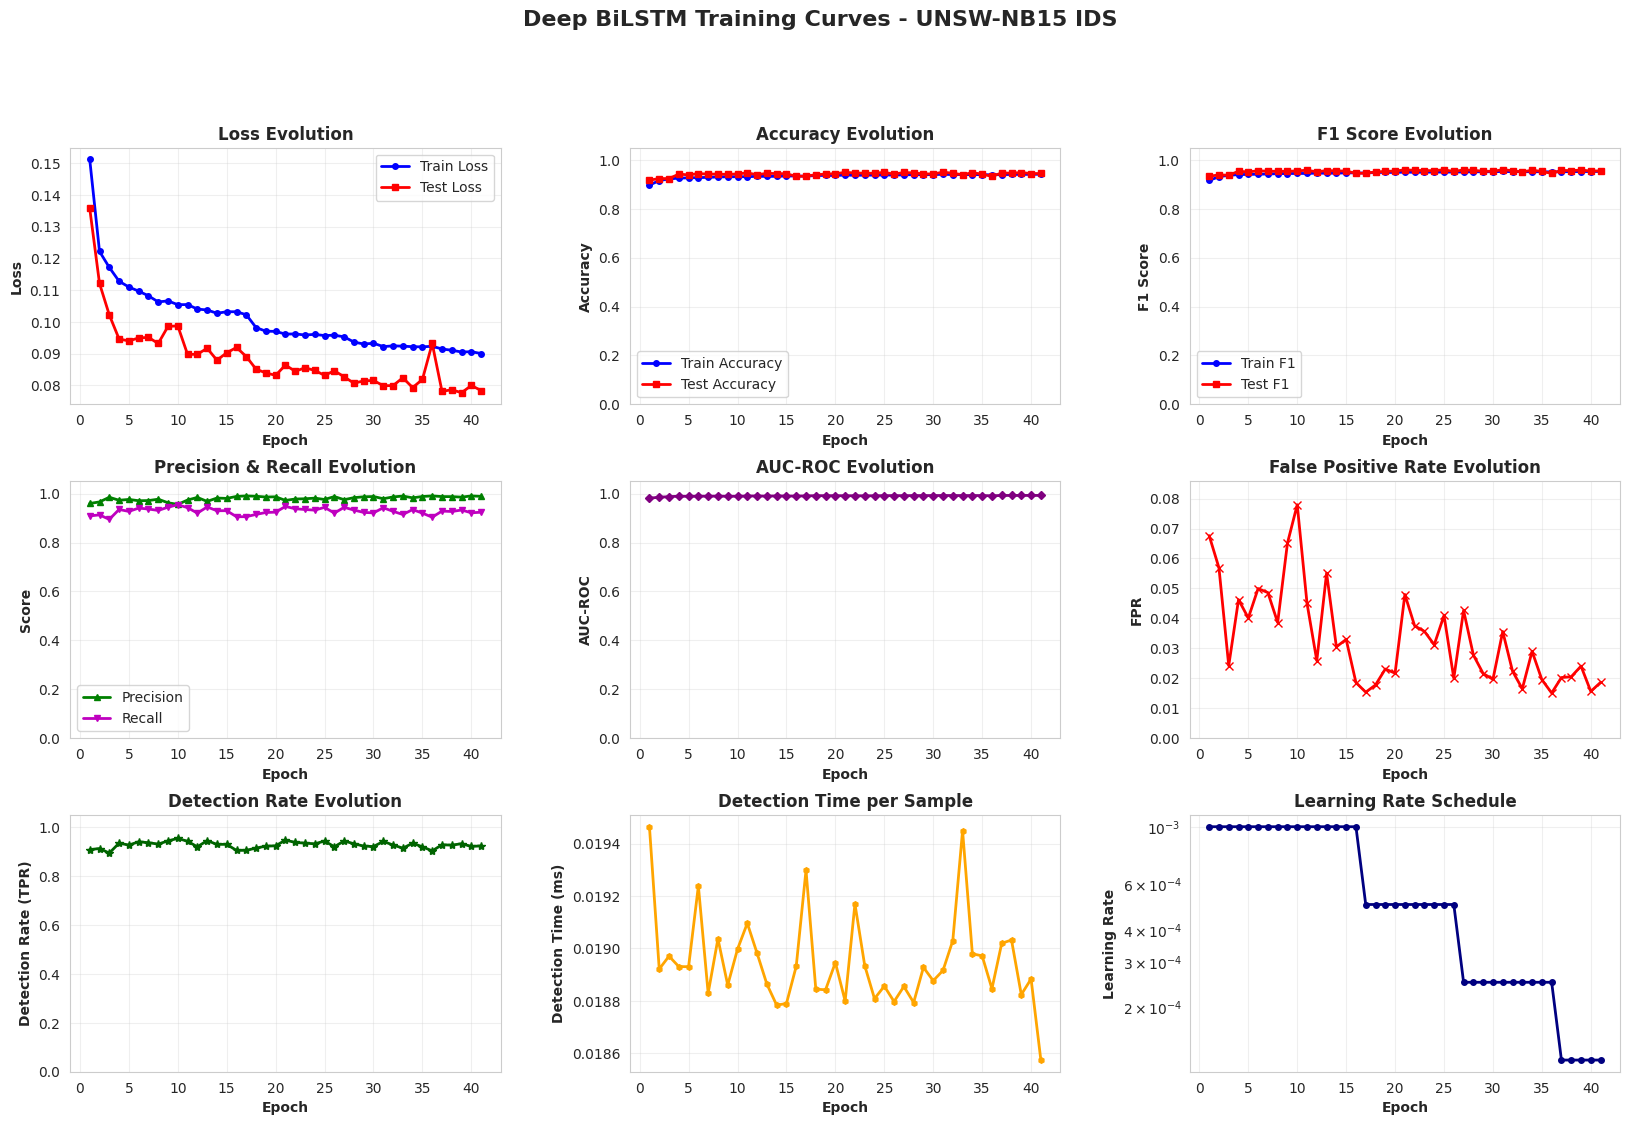

 Performance comparison saved to: deep_bilstm_performance_comparison.png


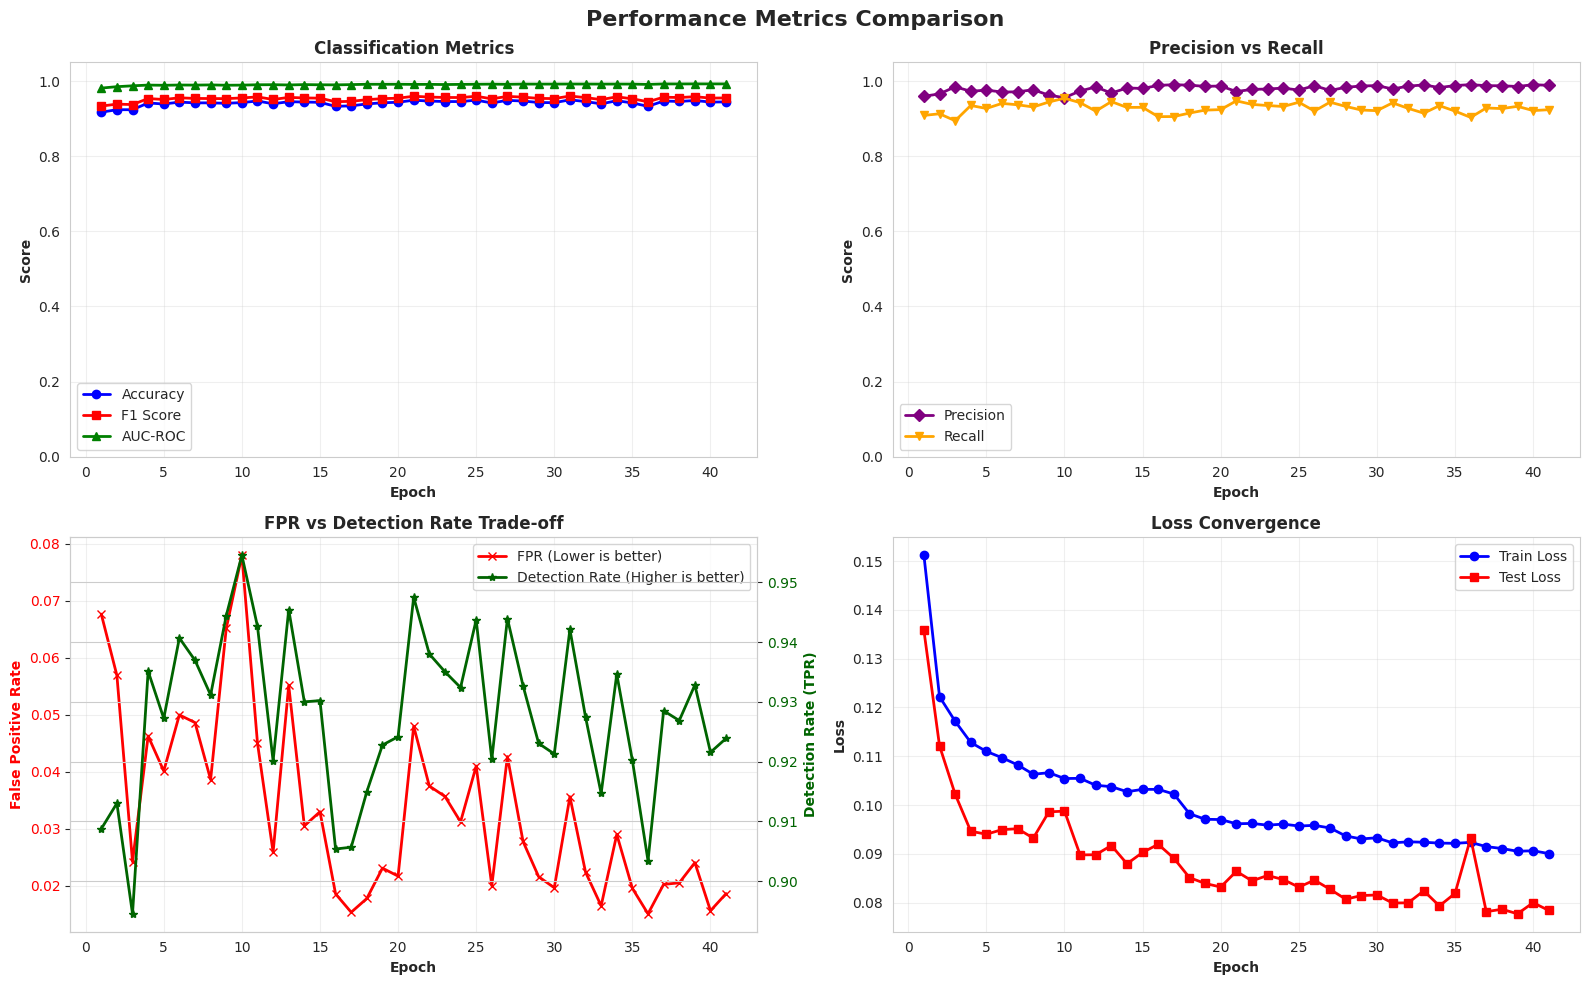

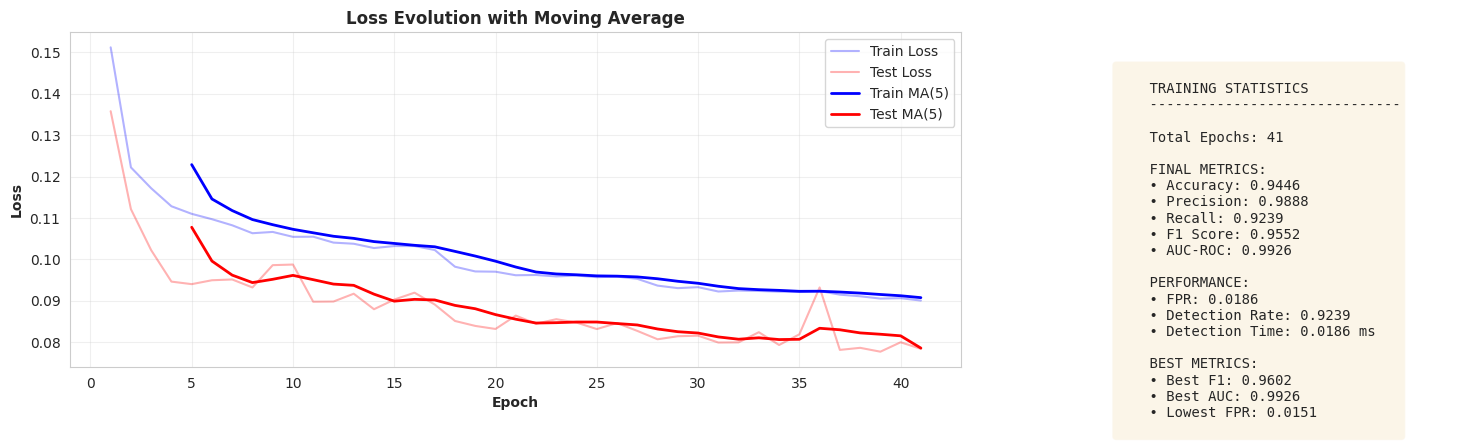

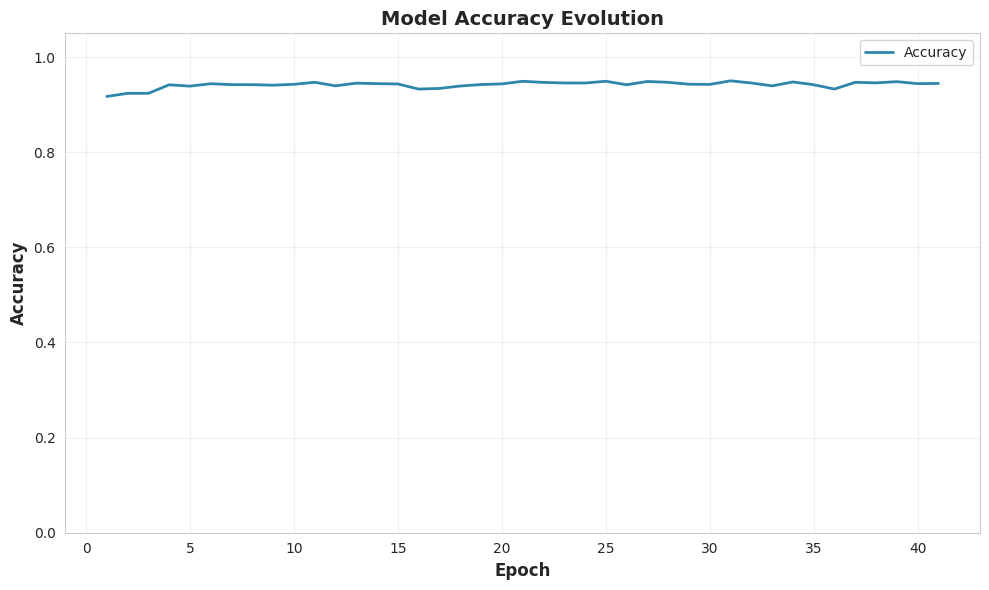

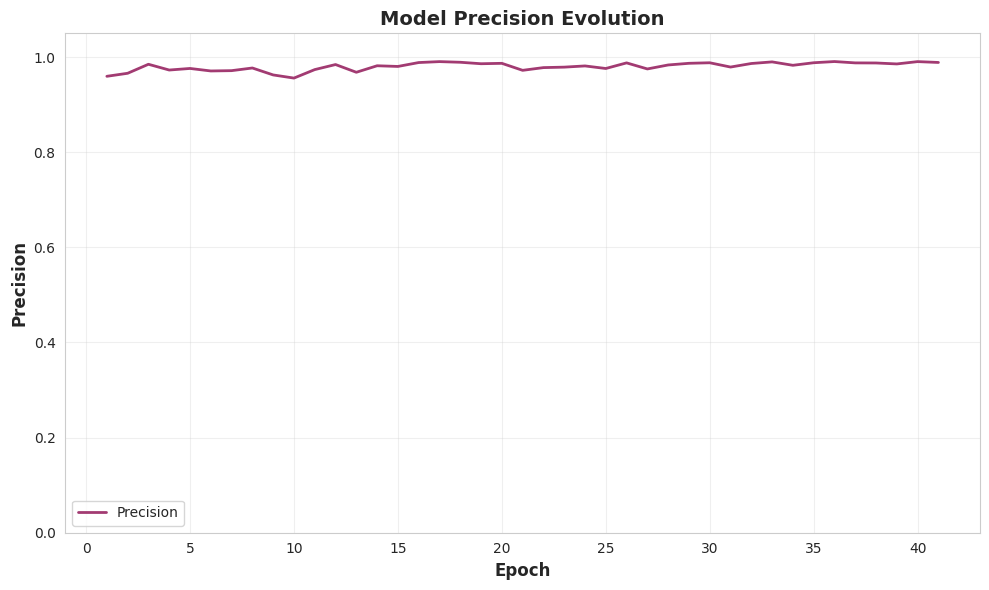

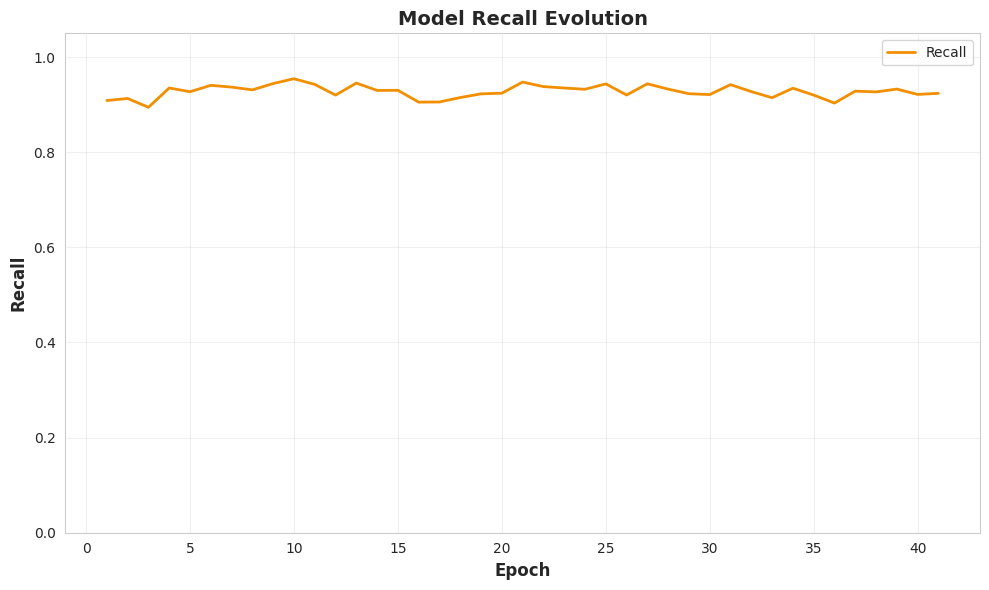

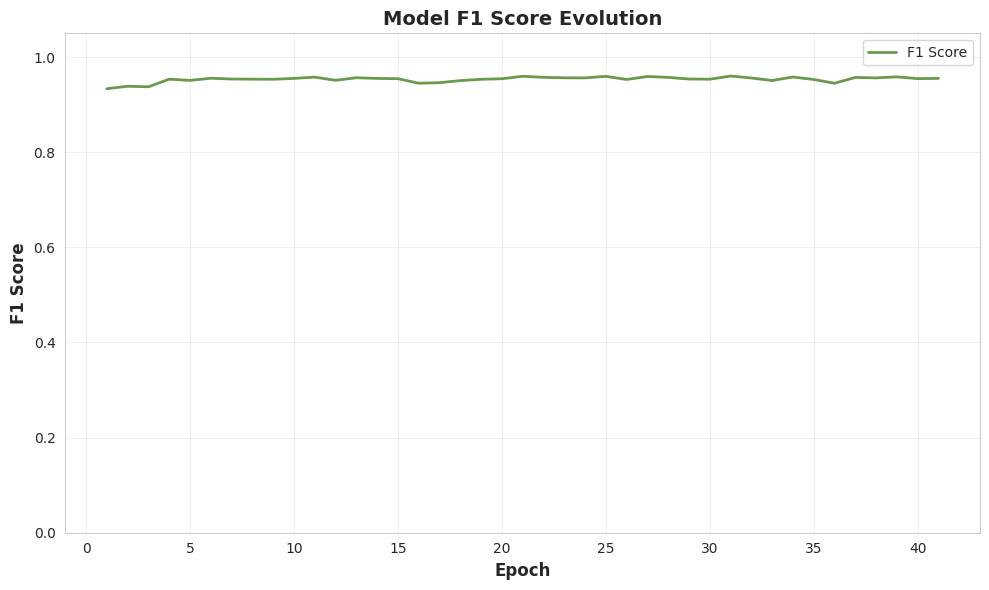

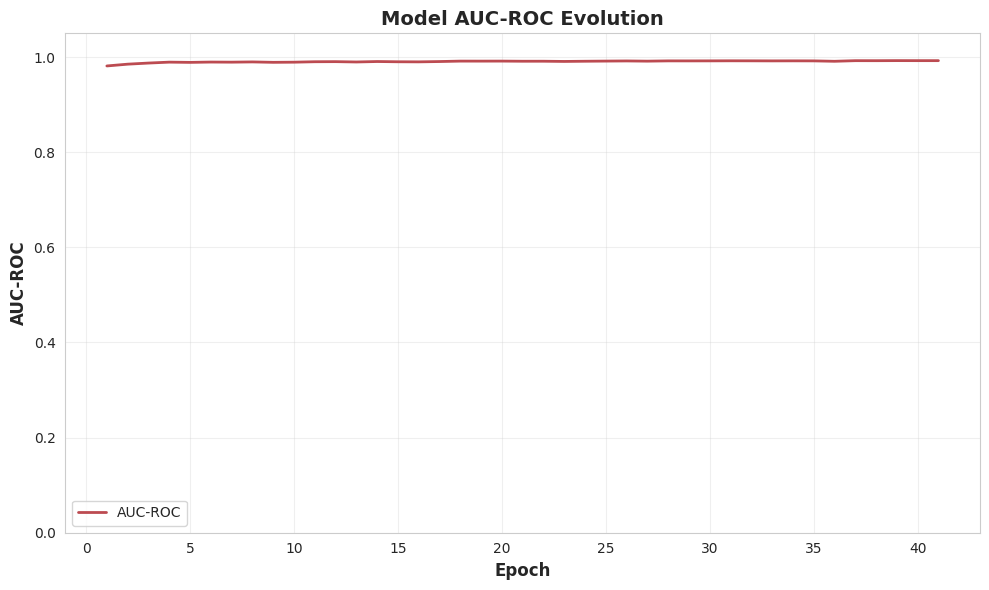


--------------------------------------------------------------------------------
DETAILED TRAINING REPORT
--------------------------------------------------------------------------------

Total Training Epochs: 41

--- LOSS ANALYSIS ---
Initial Train Loss: 0.151212
Final Train Loss: 0.090044
Loss Reduction: 40.45%
Initial Test Loss: 0.135787
Final Test Loss: 0.078383

--- ACCURACY METRICS ---
Initial Test Accuracy: 0.9173
Final Test Accuracy: 0.9446
Best Test Accuracy: 0.9502 (Epoch 31)

--- F1 SCORE ANALYSIS ---
Initial F1: 0.9335
Final F1: 0.9552
Best F1: 0.9602 (Epoch 31)
F1 Improvement: 2.17%

--- PRECISION & RECALL ---
Final Precision: 0.9888
Final Recall: 0.9239
Best Precision: 0.9907
Best Recall: 0.9545

--- AUC-ROC ---
Initial AUC: 0.9814
Final AUC: 0.9926
Best AUC: 0.9926 (Epoch 39)

--- FALSE POSITIVE RATE ---
Initial FPR: 0.0676 (6.76%)
Final FPR: 0.0186 (1.86%)
Best FPR: 0.0151 (1.51%)
FPR Reduction: 4.90%

--- DETECTION RATE (TPR) ---
Initial Detection Rate: 0.9087 (90.87

In [35]:
#training
model, history = train_deep_bilstm(
    train_loader=train_loader,
    test_loader=test_loader,
    pos_weight=pos_weight,
    num_epochs=50,
    learning_rate=0.001,
    patience=10
)

# Load visualizations
generate_all_visualizations(history, prefix='deep_bilstm')